### Machine learning model 
Decode 11.1 Round – Data Modelling and Machine Learning

#### Data gathering

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\vikrant\Desktop\New folder\train.csv")
df.head()

,ID,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,net-income
0,0,60,Self-emp-not-inc,235535,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,<=50K
1,1,28,Self-emp-not-inc,123983,Some-college,10,Married-civ-spouse,Sales,Own-child,Asian-Pac-Islander,Male,0,0,63,South,<=50K
2,2,71,Self-emp-not-inc,130436,1st-4th,2,Divorced,Craft-repair,Not-in-family,White,Female,0,0,28,United-States,<=50K
3,3,75,NaN,35724,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,0,8,United-States,<=50K
4,4,50,Private,128143,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1887,50,United-States,>50K


In [3]:
####Remove too columns. (fnlwgt,education-num and education)

df.drop(["fnlwgt","education","education-num"], axis = 1, inplace = True)

In [4]:
df

,ID,age,workclass,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,net-income
0,0,60,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,<=50K
1,1,28,Self-emp-not-inc,Married-civ-spouse,Sales,Own-child,Asian-Pac-Islander,Male,0,0,63,South,<=50K
2,2,71,Self-emp-not-inc,Divorced,Craft-repair,Not-in-family,White,Female,0,0,28,United-States,<=50K
3,3,75,NaN,Widowed,NaN,Not-in-family,White,Female,0,0,8,United-States,<=50K
4,4,50,Private,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1887,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32719,32719,56,Private,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,66,United-States,<=50K
32720,32720,36,Private,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,45,United-States,<=50K
32721,32721,32,Self-emp-not-inc,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,32,United-States,<=50K
32722,32722,55,Private,Divorced,Adm-clerical,Unmarried,White,Female,4650,0,20,United-States,<=50K


In [5]:

df.describe()

,ID,age,capital-gain,capital-loss,hours-per-week
count,32724.000000,32724.000000,32724.000000,32724.000000,32724.000000
mean,16361.500000,38.574257,1078.228792,87.700403,40.406216
std,9446.749441,13.712166,7480.459910,401.872849,12.454379
min,0.000000,17.000000,0.000000,0.000000,1.000000
25%,8180.750000,28.000000,0.000000,0.000000,40.000000
50%,16361.500000,37.000000,0.000000,0.000000,40.000000
75%,24542.250000,48.000000,0.000000,0.000000,45.000000
max,32723.000000,90.000000,99999.000000,4356.000000,99.000000


#### data cleaning

In [6]:
### missing values
df.isnull().sum()

ID                   0
age                  0
workclass         1895
marital-status       0
occupation        1901
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     568
net-income           0
dtype: int64

In [7]:
### Removing null values of attributes (workclass, occupation,native-country).

df.dropna(how='any', subset=['workclass'], axis=0, inplace= True)
df.dropna(how='any', subset=['occupation'], axis=0, inplace= True)
df.dropna(how='any', subset=['native-country'], axis=0, inplace= True)

In [8]:
df.isnull().sum()


ID                0
age               0
workclass         0
marital-status    0
occupation        0
relationship      0
race              0
gender            0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
net-income        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30282 entries, 0 to 32723
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              30282 non-null  int64 
 1   age             30282 non-null  int64 
 2   workclass       30282 non-null  object
 3   marital-status  30282 non-null  object
 4   occupation      30282 non-null  object
 5   relationship    30282 non-null  object
 6   race            30282 non-null  object
 7   gender          30282 non-null  object
 8   capital-gain    30282 non-null  int64 
 9   capital-loss    30282 non-null  int64 
 10  hours-per-week  30282 non-null  int64 
 11  native-country  30282 non-null  object
 12  net-income      30282 non-null  object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


In [10]:
df['hours-per-week'] = df['hours-per-week'].astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30282 entries, 0 to 32723
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              30282 non-null  int64  
 1   age             30282 non-null  int64  
 2   workclass       30282 non-null  object 
 3   marital-status  30282 non-null  object 
 4   occupation      30282 non-null  object 
 5   relationship    30282 non-null  object 
 6   race            30282 non-null  object 
 7   gender          30282 non-null  object 
 8   capital-gain    30282 non-null  int64  
 9   capital-loss    30282 non-null  int64  
 10  hours-per-week  30282 non-null  float64
 11  native-country  30282 non-null  object 
 12  net-income      30282 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 3.2+ MB


#### Feature engineering


In [12]:
print('age',df.workclass.unique())
print('workclass',df.workclass.unique())
print('marital-status',df['marital-status'].unique())
print('occupation',df.occupation.unique())
print('relationship',df.relationship.unique())
print('race',df.race.unique())
print('gender',df.gender.unique())
print('native-country',df['native-country'].unique())
print('net-income',df['net-income'].unique())

age ['Self-emp-not-inc' 'Private' 'State-gov' 'Local-gov' 'Federal-gov'
 'Self-emp-inc' 'Without-pay']
workclass ['Self-emp-not-inc' 'Private' 'State-gov' 'Local-gov' 'Federal-gov'
 'Self-emp-inc' 'Without-pay']
marital-status ['Married-civ-spouse' 'Divorced' 'Widowed' 'Never-married'
 'Married-spouse-absent' 'Separated' 'Married-AF-spouse']
occupation ['Exec-managerial' 'Sales' 'Craft-repair' 'Transport-moving'
 'Machine-op-inspct' 'Tech-support' 'Handlers-cleaners' 'Adm-clerical'
 'Prof-specialty' 'Other-service' 'Priv-house-serv' 'Protective-serv'
 'Farming-fishing' 'Armed-Forces']
relationship ['Husband' 'Own-child' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']
race ['White' 'Asian-Pac-Islander' 'Black' 'Other' 'Amer-Indian-Eskimo']
gender ['Male' 'Female']
native-country ['United-States' 'South' 'India' 'Mexico' 'Iran' 'Cuba' 'Vietnam'
 'England' 'Philippines' 'Laos' 'China' 'Poland' 'El-Salvador'
 'Dominican-Republic' 'Canada' 'Jamaica' 'Guatemala' 'Hong' 'Haiti'
 'Germany

In [13]:
## age 

C:\Users\vikrant\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vikrant\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

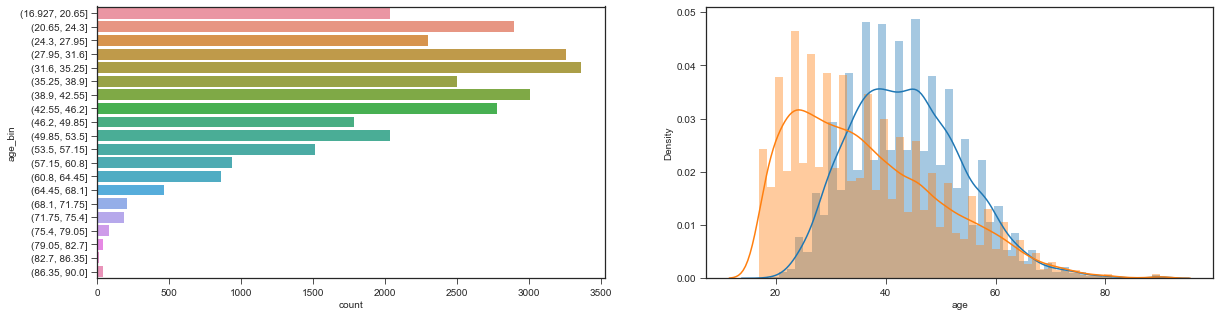

In [14]:
# make the age variable discretized 
df['age_bin'] = pd.cut(df['age'], 20)


plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age_bin", data=df)
plt.subplot(1, 2, 2)
sns.distplot(df[df['net-income'] == '>50K']['age'], kde_kws={"label": ">$50K"})
sns.distplot(df[df['net-income'] == '<=50K']['age'], kde_kws={"label": "<=$50K"})

In [15]:
## workclass

<AxesSubplot:xlabel='count', ylabel='workclass'>

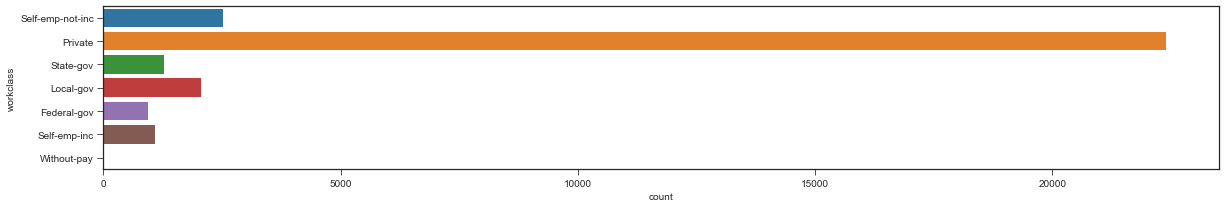

In [16]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,3)) 
sns.countplot(y="workclass", data=df)

In [17]:
## Marital status

In [18]:
df['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
df['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
df['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
df['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
df['marital-status'].replace(['Separated'], 'Separated',inplace=True)
df['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
df['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)

<AxesSubplot:xlabel='count', ylabel='marital-status'>

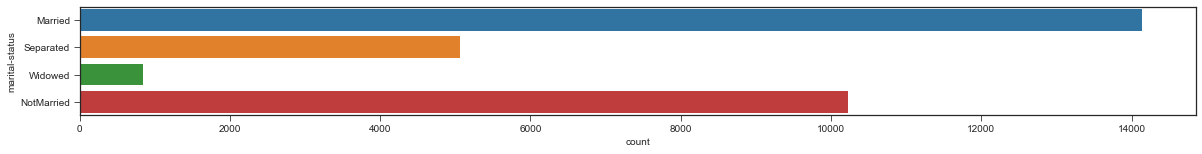

In [19]:
fig = plt.figure(figsize=(20,2))
plt.style.use('seaborn-ticks')
sns.countplot(y="marital-status", data=df)

In [20]:
## occupation


<AxesSubplot:xlabel='count', ylabel='occupation'>

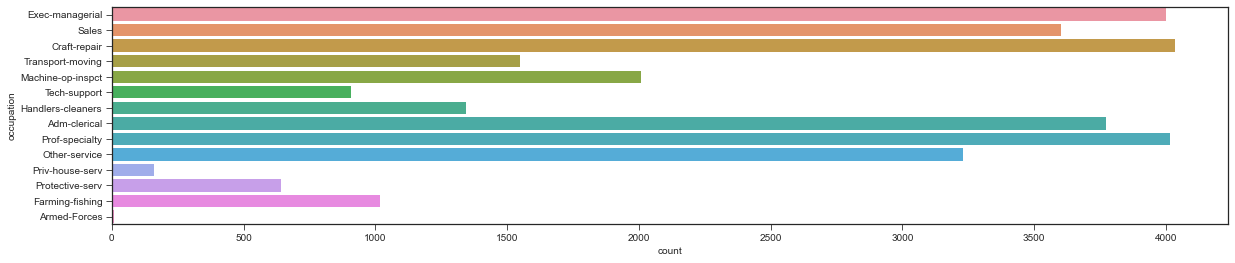

In [21]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="occupation", data=df)

In [22]:
## relationship

<AxesSubplot:xlabel='count', ylabel='relationship'>

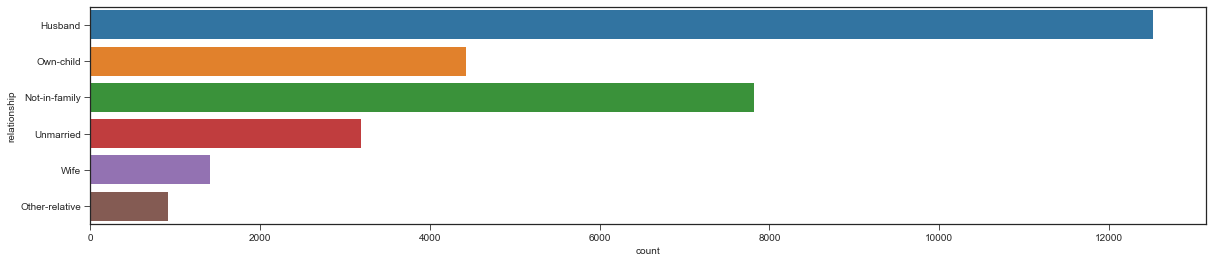

In [23]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="relationship", data=df)

<AxesSubplot:xlabel='count', ylabel='race'>

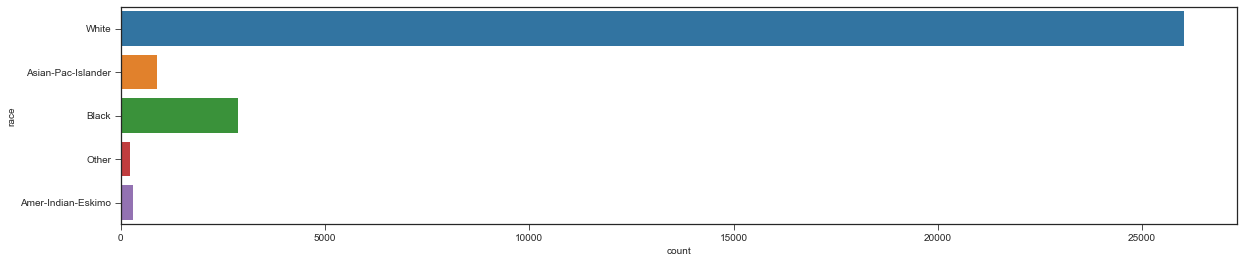

In [24]:
## race
plt.style.use('seaborn-ticks')
plt.figure(figsize=(20,4)) 
sns.countplot(y="race", data=df)

<AxesSubplot:xlabel='race', ylabel='prop'>

<Figure size 1440x360 with 0 Axes>

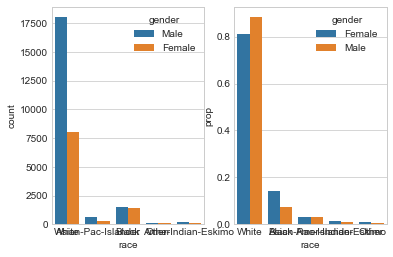

In [25]:
plt.style.use('seaborn-whitegrid')
x, y, hue = "race", "prop", "gender"
#hue_order = ["Male", "Female"]
plt.figure(figsize=(20,5)) 
f, axes = plt.subplots(1, 2)
sns.countplot(x=x, hue=hue, data=df, ax=axes[0])

prop_df = (df[x]
           .groupby(df[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())

sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])

<AxesSubplot:xlabel='count', ylabel='net-income'>

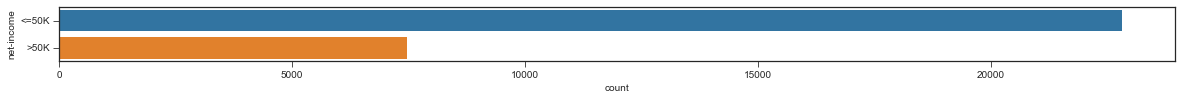

In [26]:
## net-income
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="net-income", data=df)

In [27]:
## hours-per-week

In [28]:
df['hours-per-week_bin'] = pd.cut(df['hours-per-week'], 10)
df['hours-per-week'] = df['hours-per-week']

C:\Users\vikrant\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vikrant\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vikrant\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

(20.0, 60.0)

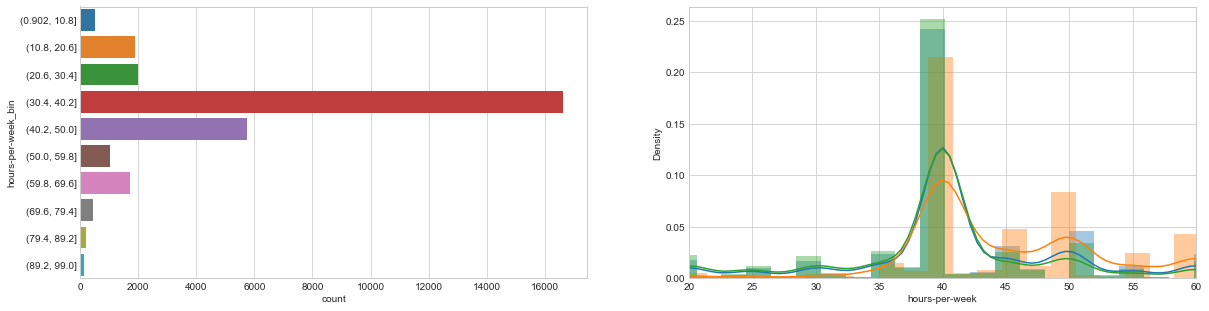

In [29]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="hours-per-week_bin", data=df);
plt.subplot(1, 2, 2)
sns.distplot(df['hours-per-week']);
sns.distplot(df[df['net-income'] == '>50K']['hours-per-week'], kde_kws={"label": ">$50K"})
sns.distplot(df[df['net-income'] == '<=50K']['hours-per-week'], kde_kws={"label": "<$50K"})
plt.ylim(0, None)
plt.xlim(20, 60)

C:\Users\vikrant\anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\vikrant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='hours-per-week'>

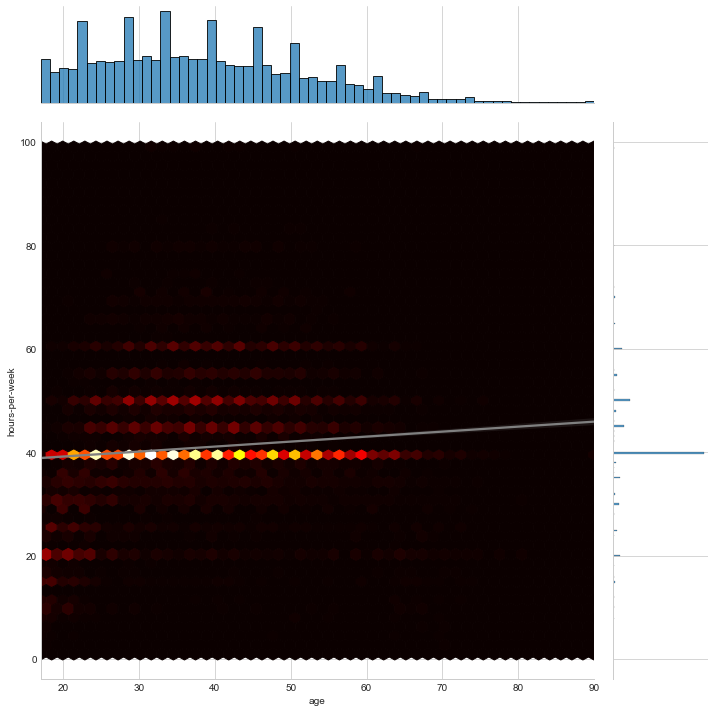

In [30]:
### Create a crossing feature: Age + hour of work
g = sns.jointplot(x = 'age', 
              y = 'hours-per-week',
              data = df, 
              kind = 'hex', 
              cmap= 'hot', 
              size=10)

sns.regplot(df.age, df['hours-per-week'], ax=g.ax_joint, scatter=False, color='grey')

C:\Users\vikrant\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\vikrant\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age-hours', ylabel='Density'>

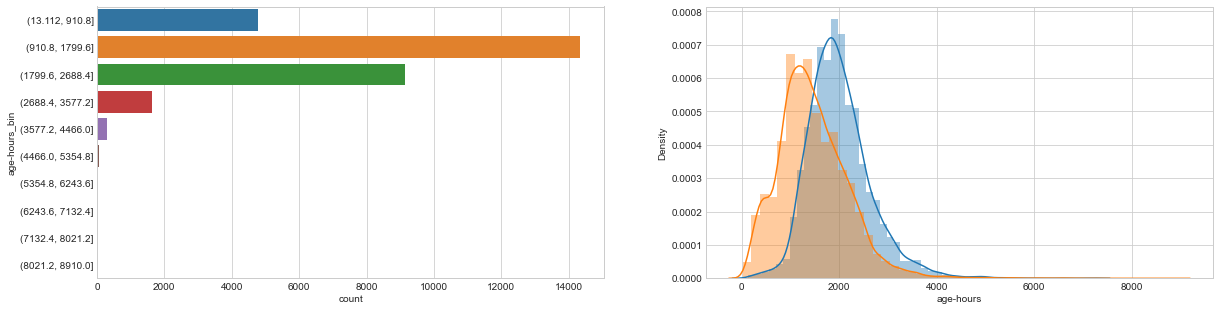

In [31]:
df['age-hours'] = df['age']*df['hours-per-week']
df['age-hours_bin'] = pd.cut(df['age-hours'], 10)

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="age-hours_bin", data=df);
plt.subplot(1, 2, 2)
sns.distplot(df[df['net-income'] == '>50K']['age-hours'], kde_kws={"label": ">$50K"})
sns.distplot(df[df['net-income'] == '<=50K']['age-hours'], kde_kws={"label": "<$50K"})

In [32]:
df[['net-income', 'age']].groupby(['net-income'], as_index=False).mean().sort_values(by='age', ascending=False)

,net-income,age
1,>50K,43.967604
0,<=50K,36.674513


In [33]:
#### Occupation vs Income Level

<AxesSubplot:xlabel='occupation', ylabel='age'>

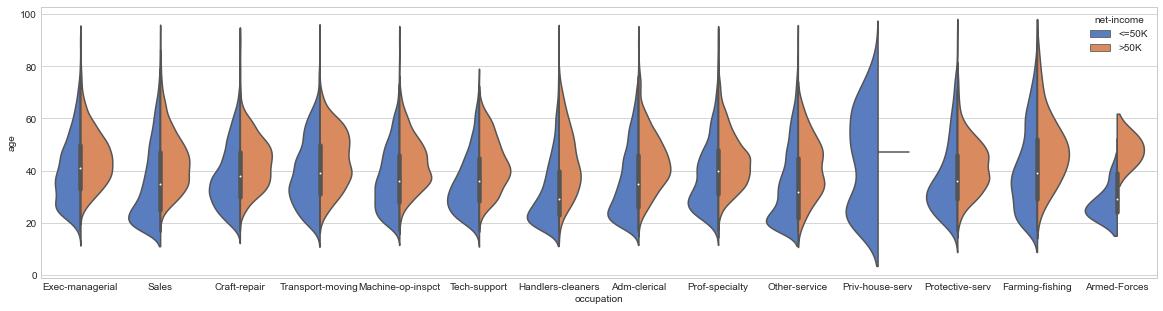

In [34]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="occupation", y="age", hue="net-income",
                    data=df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

In [35]:
#### Race vs Income Level

<AxesSubplot:xlabel='race', ylabel='age'>

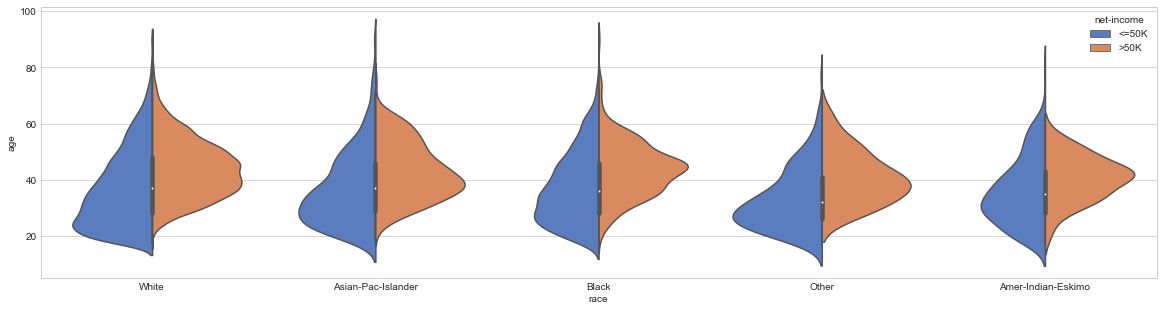

In [36]:
from matplotlib import pyplot
a4_dims = (20, 5)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sns.violinplot(x="race", y="age", hue="net-income",
                    data=df, gridsize=100, palette="muted", split=True, saturation=0.75)
ax

#### Bivariate Analysis

In [37]:
df.tail()

,ID,age,workclass,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,net-income,age_bin,hours-per-week_bin,age-hours,age-hours_bin
32719,32719,56,Private,NotMarried,Prof-specialty,Not-in-family,White,Male,0,0,66.0,United-States,<=50K,"(53.5, 57.15]","(59.8, 69.6]",3696.0,"(3577.2, 4466.0]"
32720,32720,36,Private,Married,Machine-op-inspct,Husband,White,Male,0,0,45.0,United-States,<=50K,"(35.25, 38.9]","(40.2, 50.0]",1620.0,"(910.8, 1799.6]"
32721,32721,32,Self-emp-not-inc,Married,Craft-repair,Husband,White,Male,0,0,32.0,United-States,<=50K,"(31.6, 35.25]","(30.4, 40.2]",1024.0,"(910.8, 1799.6]"
32722,32722,55,Private,Separated,Adm-clerical,Unmarried,White,Female,4650,0,20.0,United-States,<=50K,"(53.5, 57.15]","(10.8, 20.6]",1100.0,"(910.8, 1799.6]"
32723,32723,46,Private,Married,Exec-managerial,Husband,White,Male,0,1902,50.0,United-States,>50K,"(42.55, 46.2]","(40.2, 50.0]",2300.0,"(1799.6, 2688.4]"


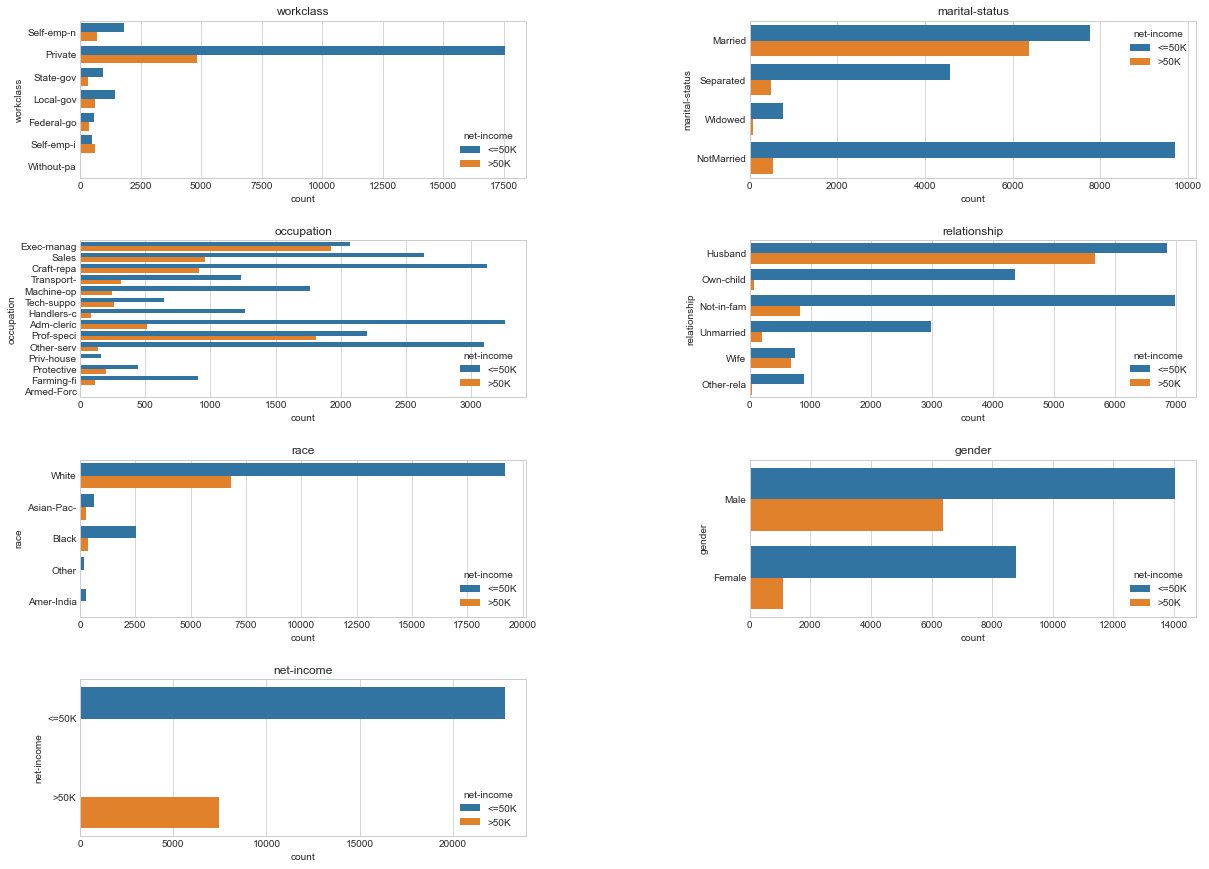

In [38]:
import math

def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    dataset = dataset.select_dtypes(include=[np.object])
    plt.style.use('seaborn-whitegrid')
    
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    
    rows = math.ceil(float(dataset.shape[1]) / cols)
    
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            
bivariate_df = df.loc[:, ['workclass',
           'marital-status', 'occupation', 
           'relationship', 'race', 'gender','net-income']]  

plot_bivariate_bar(bivariate_df, hue='net-income', cols=2, width=20, height=15, hspace=0.4, wspace=0.5)

C:\Users\vikrant\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


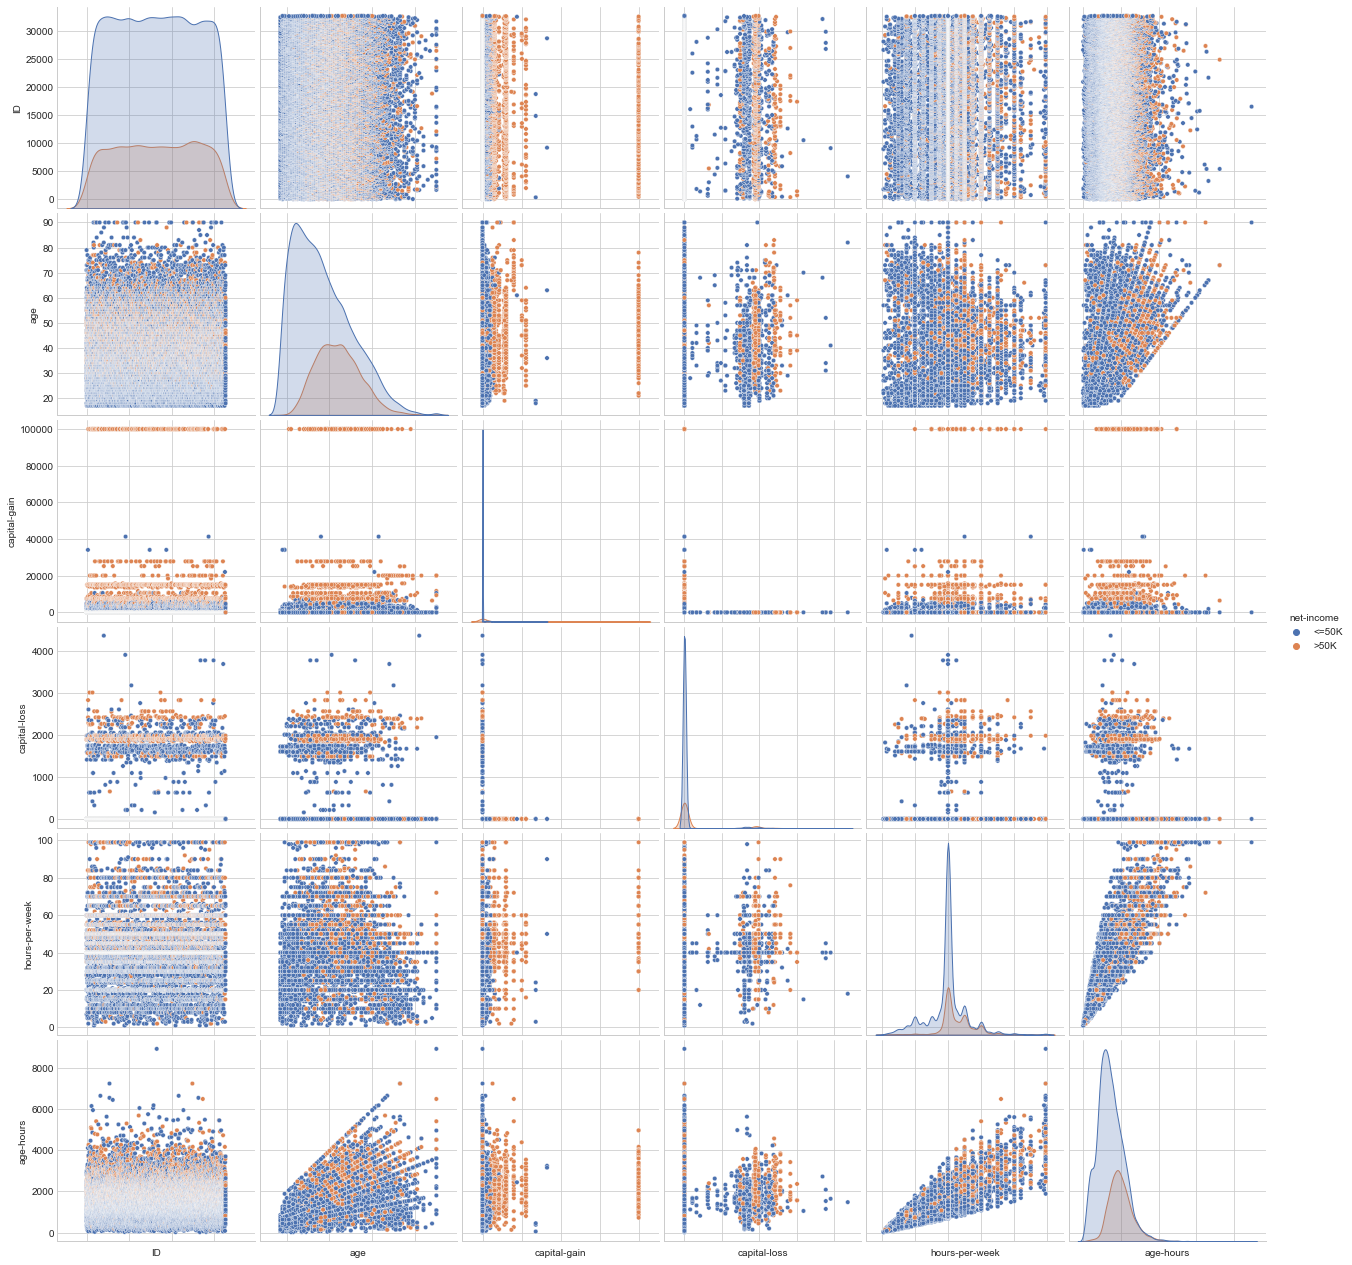

In [46]:
### EDA- PAIR PLOT
pp = sns.pairplot(df, hue = 'net-income', palette = 'deep', 
                  size=3, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=20) )
pp.set(xticklabels=[])

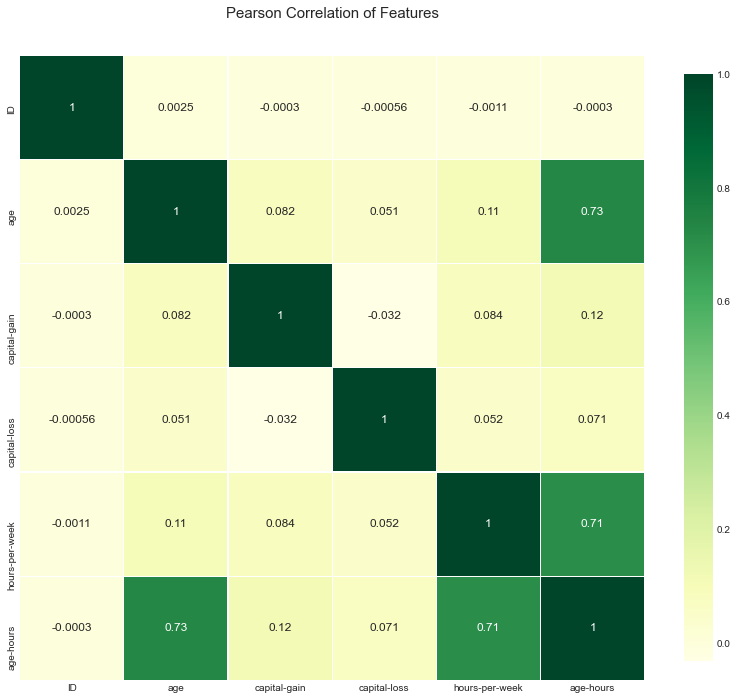

In [47]:
### Correlation Heatmap
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = "YlGn",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

### Building Machine Learning Models

In [48]:
from sklearn.cluster import KMeans
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import GridSearchCV


#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
#train,test=train_test_split(train_df,test_size=0.2,random_state=0,stratify=abalone_data['Sex'])

#### Feature Selection and Encoding

In [49]:
#training and testing data split

from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [50]:
df = df.apply(LabelEncoder().fit_transform)
df.head()

,ID,age,workclass,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,net-income,age_bin,hours-per-week_bin,age-hours,age-hours_bin
0,0,43,4,0,3,0,4,1,0,0,47,38,0,11,4,977,3
1,1,11,4,0,11,3,1,1,0,0,62,34,0,3,6,655,1
2,2,54,4,2,2,1,4,0,0,0,27,38,0,14,2,727,2
4,3,33,2,0,2,0,4,1,0,49,49,38,1,9,4,885,2
5,4,18,2,0,11,0,4,1,91,0,47,38,1,4,4,628,1


In [51]:
drop_elements = ['native-country', 'net-income', 'age_bin', 'age-hours_bin','hours-per-week_bin']
y = df["net-income"]
X = df.drop(drop_elements, axis=1)
X.head()

,ID,age,workclass,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,age-hours
0,0,43,4,0,3,0,4,1,0,0,47,977
1,1,11,4,0,11,3,1,1,0,0,62,655
2,2,54,4,2,2,1,4,0,0,0,27,727
4,3,33,2,0,2,0,4,1,0,49,49,885
5,4,18,2,0,11,0,4,1,91,0,47,628


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

#### classification models

In [53]:
## Perceptron Method
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=1, random_state=1)
ppn.fit(X_train, y_train)

0.752187551593198

In [54]:
## cross_val_score for ppn method
from sklearn.model_selection import cross_val_score
score_ppn=cross_val_score(ppn, X,y, cv=5)
score_ppn.mean()

0.72082746929271

In [55]:
#### Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
# y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

The accuracy of Gaussian Naive Bayes is 0.7990754498926862


In [57]:
# Support Vector Classifier (SVM/SVC)
from sklearn.svm import SVC
svc = SVC(gamma=0.22)
svc.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_svc = svc.score(X_test,y_test)
print('The accuracy of SVC is', score_svc)

The accuracy of SVC is 0.7511969621925045


In [58]:
### Radical Support Vector Machine
svc_radical =svm.SVC(kernel='rbf',C=1,gamma=0.22)
svc_radical.fit(X_train,y_train.values.ravel())
score_svc_radical = svc_radical.score(X_test,y_test)
print('The accuracy of Radical SVC Model is', score_svc_radical)

The accuracy of Radical SVC Model is 0.7511969621925045


In [59]:
#### Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

The accuracy of the Logistic Regression is 0.8005613339937263


C:\Users\vikrant\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
#### Random Forest
randomforest = RandomForestClassifier()
randomforest.fit(X_train, y_train)
#y_pred = randomforest.predict(X_test)
score_randomforest = randomforest.score(X_test,y_test)
print('The accuracy of the Random Forest Model is', score_randomforest)

The accuracy of the Random Forest Model is 0.8357272577183424


In [61]:
#### K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)

The accuracy of the KNN Model is 0.7436024434538551


In [ ]:
#### Cross Validation
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Naive Bayes','Linear Svm','Radial Svm','Logistic Regression','Decision Tree','KNN','Random Forest']
models=[GaussianNB(), svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors=9),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
models_dataframe=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
models_dataframe

### Random Forest is the most accurate model.